# 1.3.3 Type I and Type II Errors


## **Recommended Readings**:
<ul>
<b><U>
<li><a href="https://blog.devgenius.io/hypothesis-testing-f6162726321a">Hypotheses Testing</a></li>
<li><a href="https://medium.com/@arshadhp/type-1-type-2-errors-455a0bb98cfc">Hypotheses Testing: Type I and Type II errors (1)</a></li>
<li><a href="https://monalishakumari.medium.com/hypothesis-testing-type-1-and-type-2-error-69cede85454c">Hypotheses Testing: Type I and Type II errors (2)</a></li>
</U></b>    
</ul>

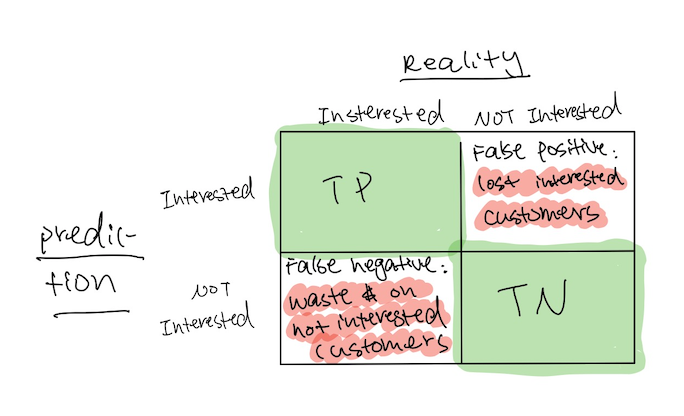

## Understanding and Calculating Type I and Type II Errors

In hypothesis testing, two types of errors can occur:

1. **Type I Error (α)**: This occurs when the null hypothesis (<i>H<sub>0</sub></i>) is true, but we incorrectly reject it. The probability of making a Type I error is denoted by the significance level (α).

2. **Type II Error (β)**: This occurs when the null hypothesis is false, but we fail to reject it. The probability of making a Type II error is denoted by β.

### Definitions

- **Type I Error (α)**: Rejecting <i>H<sub>0</sub></i> when it is true.
- **Type II Error (β)**: Failing to reject <i>H<sub>0</sub></i> when it is false.

### Calculations

Let's assume we are conducting a hypothesis test where we want to determine if the mean of a population is different from a specific value (μ).

1. **Null Hypothesis (<i>H<sub>0</sub></i>)**: &mu; = &mu;<sub>0</sub>
2. **Alternative Hypothesis (<i>H<sub>a</sub></i>)**: &mu; = &mu;<sub>1</sub>

Given:
- &mu;<sub>0</sub>: Mean under the null hypothesis
- &mu;<sub>1</sub>: Mean under the alternative hypothesis
- &sigma;: Standard deviation
- &alpha;: Significance level

The critical value (z<sub>&alpha;</sub>) for a given &alpha; is calculated using the cumulative distribution function (CDF) of the standard normal distribution:

<div align="center">
    <img src="https://latex.codecogs.com/png.image?\dpi{150} \bg{white} z_{\alpha} = \frac{\mu - \mu_0}{\sigma / \sqrt{n}}" title="z_{\alpha} = \frac{\mu - \mu_0}{\sigma / \sqrt{n}}" />
</div>


To calculate the Type II error probability (&beta;), we need to find the z-value that corresponds to the overlap between the null and alternative hypothesis distributions. This is done as follows:

<div align="center">
    <img src="https://latex.codecogs.com/png.image?\dpi{150} \bg{white} z_{\beta} = \frac{\mu_0 - \mu_1}{\sigma} + z_{\alpha}" title="z_{\beta} = \frac{\mu_0 - \mu_1}{\sigma} + z_{\alpha}" />
</div>

The Type II error probability (&beta;) is then:

<div align="center">
    <img src="https://latex.codecogs.com/png.image?\dpi{150} \bg{white} \beta = \Phi(z_{\beta})" title="\beta = \Phi(z_{\beta})" />
</div>

                                                                  OR
<div align="center">
    <img src="https://latex.codecogs.com/png.image?\dpi{150} \bg{white} \beta = \text{norm.cdf}(z_{\beta})" title="\beta = \text{norm.cdf}(z_{\beta})" />
</div>

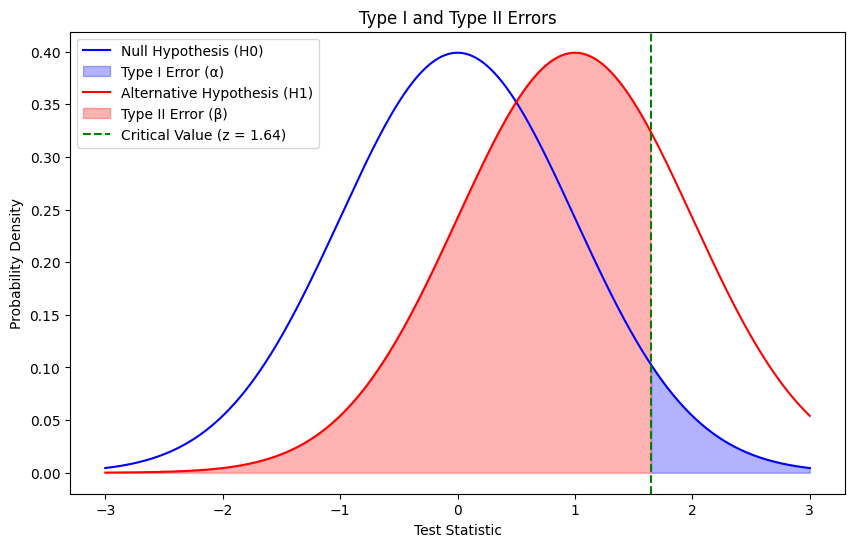

Type I Error (α): 0.05
Type II Error (β): 0.7405


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the test
mu_0 = 0  # Mean under null hypothesis
mu_1 = 1  # Mean under alternative hypothesis
sigma = 1  # Standard deviation
alpha = 0.05  # Significance level

# Calculate the critical value for the significance level
z_alpha = norm.ppf(1 - alpha)

# Calculate the Type II error probability (beta)
z_beta = (mu_0 - mu_1) / sigma + z_alpha
beta = norm.cdf(z_beta)

# Generate x values for plotting
x = np.linspace(-3, 3, 1000)
y_null = norm.pdf(x, mu_0, sigma)
y_alt = norm.pdf(x, mu_1, sigma)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the null hypothesis distribution
plt.plot(x, y_null, label='Null Hypothesis (H0)', color='blue')
plt.fill_between(x, 0, y_null, where=(x >= z_alpha), color='blue', alpha=0.3, label='Type I Error (α)')

# Plot the alternative hypothesis distribution
plt.plot(x, y_alt, label='Alternative Hypothesis (H1)', color='red')
plt.fill_between(x, 0, y_alt, where=(x <= z_alpha), color='red', alpha=0.3, label='Type II Error (β)')

# Add a vertical line for the critical value
plt.axvline(x=z_alpha, color='green', linestyle='--', label=f'Critical Value (z = {z_alpha:.2f})')

# Labels and legend
plt.title('Type I and Type II Errors')
plt.xlabel('Test Statistic')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()

# Print the calculated error probabilities
print(f"Type I Error (α): {alpha}")
print(f"Type II Error (β): {beta:.4f}")

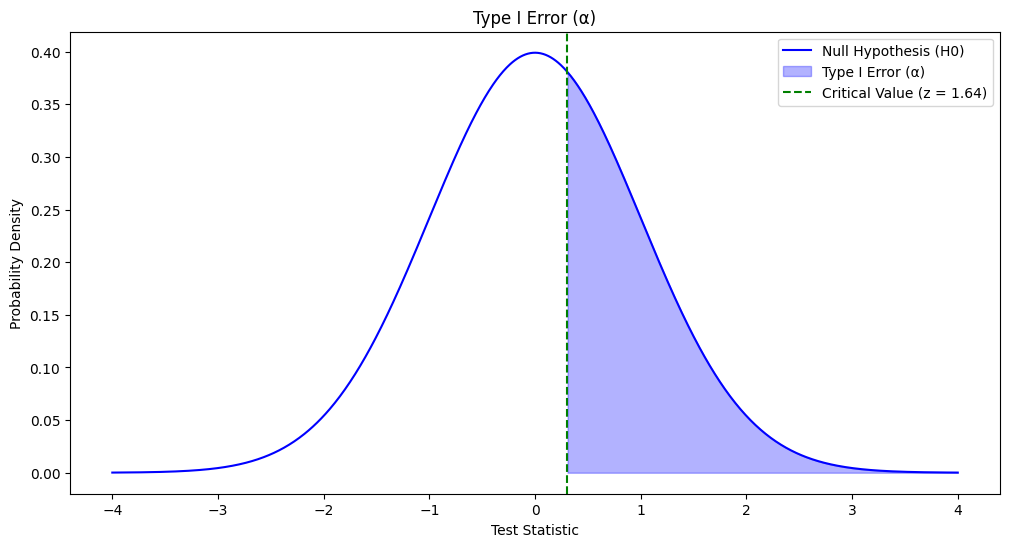

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the test
mu_0 = 0  # Mean under null hypothesis
mu_1 = 1  # Mean under alternative hypothesis
sigma = 1  # Standard deviation
alpha = 0.05  # Significance level
n = 30  # Sample size

# Calculate the critical value for the significance level
z_alpha = norm.ppf(1 - alpha)
x_critical = mu_0 + z_alpha * (sigma / np.sqrt(n))

# Part 1: Visualizing Type I Error (α)
x = np.linspace(-4, 4, 1000)
y_null = norm.pdf(x, mu_0, sigma)
y_alt = norm.pdf(x, mu_1, sigma)

plt.figure(figsize=(12, 6))

plt.plot(x, y_null, label='Null Hypothesis (H0)', color='blue')
plt.fill_between(x, 0, y_null, where=(x >= x_critical), color='blue', alpha=0.3, label='Type I Error (α)')
plt.axvline(x=x_critical, color='green', linestyle='--', label=f'Critical Value (z = {z_alpha:.2f})')
plt.title('Type I Error (α)')
plt.xlabel('Test Statistic')
plt.ylabel('Probability Density')
plt.legend()

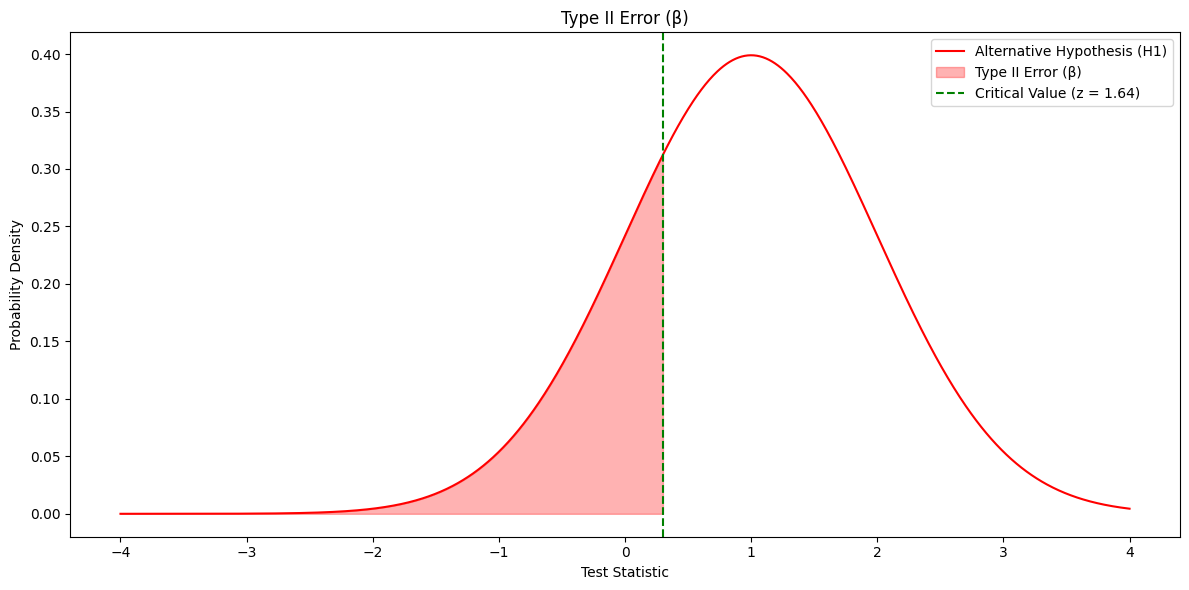

In [3]:
# Part 2: Visualizing Type II Error (β)
z_beta = (mu_0 - mu_1 + z_alpha * (sigma / np.sqrt(n))) / (sigma / np.sqrt(n))
beta = norm.cdf(z_beta)

plt.figure(figsize=(12, 6))
plt.plot(x, y_alt, label='Alternative Hypothesis (H1)', color='red')
plt.fill_between(x, 0, y_alt, where=(x <= x_critical), color='red', alpha=0.3, label='Type II Error (β)')
plt.axvline(x=x_critical, color='green', linestyle='--', label=f'Critical Value (z = {z_alpha:.2f})')
plt.title('Type II Error (β)')
plt.xlabel('Test Statistic')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
# Print the calculated error probabilities
print(f"Type I Error (α): {alpha}")
print(f"Type II Error (β): {beta:.4f}")

Type I Error (α): 0.05
Type II Error (β): 0.0001


## Conclusion

In hypothesis testing, understanding Type I and Type II errors is crucial for making informed decisions.

- **Type I Error (α)**: This occurs when we incorrectly reject a true null hypothesis. It represents a false positive result. The probability of making a Type I error is equal to the significance level (α). For example, if α = 0.05, there is a 5% chance of incorrectly rejecting the null hypothesis.

- **Type II Error (β)**: This occurs when we fail to reject a false null hypothesis. It represents a false negative result. The probability of making a Type II error (β) depends on the true population parameter, the sample size, and the chosen significance level. A common goal in hypothesis testing is to minimize both α and β, although there is often a trade-off between the two.

Visualizing these errors helps in understanding their impact on hypothesis testing. By plotting the distributions of the test statistic under both the null and alternative hypotheses, we can see where the errors occur and how changes in significance level or sample size affect these errors.

The provided Python code demonstrates how to calculate and visualize Type I and Type II errors using normal distributions. It shows how the critical value separates the areas corresponding to these errors and highlights the trade-off between them. By carefully choosing the significance level and considering the power of the test (1 - β), we can make better decisions based on the results of hypothesis testing.
